In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_olivetti_faces
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

2024-02-26 13:36:59.570022: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-26 13:36:59.592448: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-26 13:36:59.592607: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 1000)              785000    
                                                                 
 dense_3 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
start_time = time.time()
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                 epochs=10, batch_size=100, verbose=1)
print(time.time() - start_time)

Epoch 1/10


2024-02-26 13:38:26.198842: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f6829aae440 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-26 13:38:26.198862: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-02-26 13:38:26.204117: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-26 13:38:26.546859: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8905
I0000 00:00:1708922306.627835   15110 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


600/600 [==============================] - 5s 3ms/step - loss: 0.2210 - accuracy: 0.9359 - val_loss: 0.1094 - val_accuracy: 0.9661
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0859 - accuracy: 0.9744 - val_loss: 0.0783 - val_accuracy: 0.9747
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0535 - accuracy: 0.9838 - val_loss: 0.0692 - val_accuracy: 0.9792
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0368 - accuracy: 0.9890 - val_loss: 0.0789 - val_accuracy: 0.9732
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0268 - accuracy: 0.9916 - val_loss: 0.0733 - val_accuracy: 0.9767
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0181 - accuracy: 0.9945 - val_loss: 0.0669 - val_accuracy: 0.9795
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0143 - accuracy: 0.9957 - val_loss: 0.0634 - val_accuracy: 0.9810
Epoch 8/10
600/60

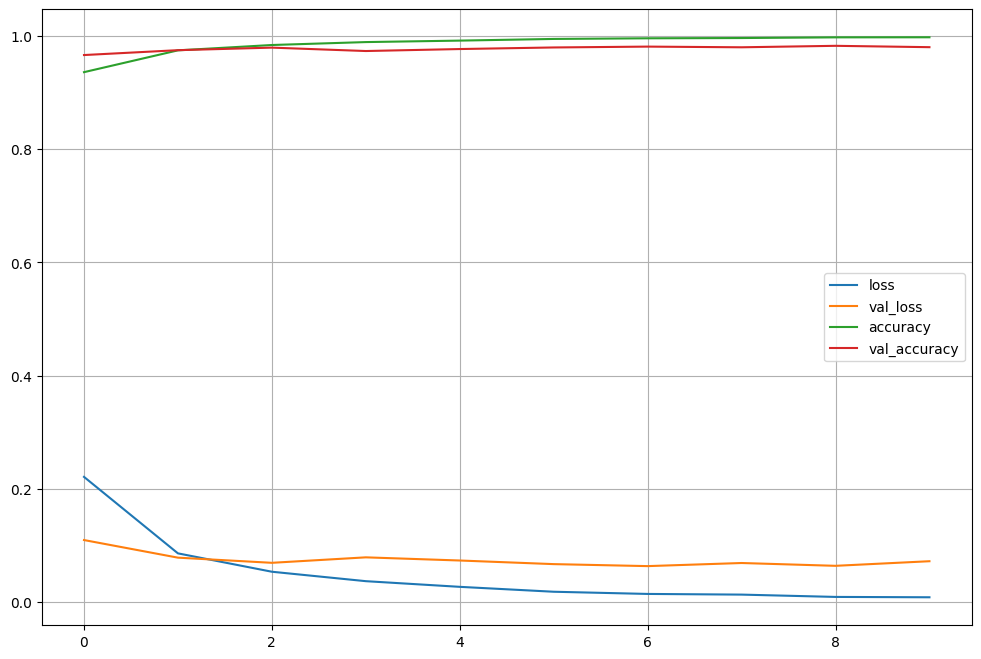

In [8]:
plot_target = ["loss", "val_loss", "accuracy", "val_accuracy"]

plt.figure(figsize=(12,8))
for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [9]:
scroe = model.evaluate(x_test, y_test)
print(scroe[0])
print(scroe[1])


313/313 [==============================] - 1s 2ms/step - loss: 0.0720 - accuracy: 0.9800
0.07203902304172516
0.9800000190734863


In [10]:
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [11]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [13]:
wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

200

In [14]:
sample = random.choices(population=wrong_result, k=16)
sample

[5140,
 149,
 2758,
 5140,
 8456,
 5982,
 2130,
 3388,
 5642,
 6574,
 2758,
 1984,
 4116,
 4504,
 2395,
 3985]

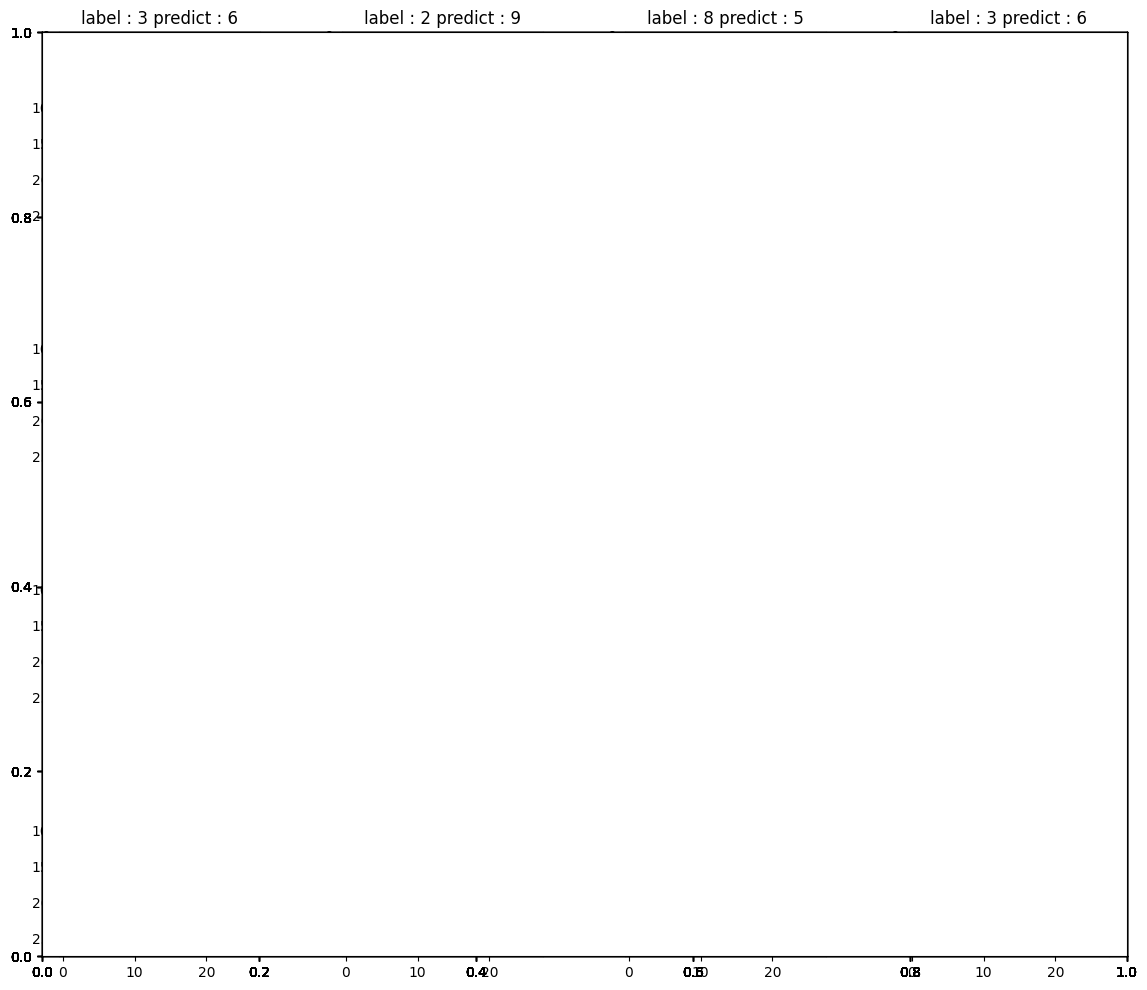

In [20]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(sample):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28,28), cmap="Greys", interpolation="nearest")
    plt.title("label : " + str(y_test[n]) + " predict : " + str(predicted_labels[n]))
    plt.axes("off")

plt.show()

In [ ]:
G